In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pydataset import data

from statsmodels.formula.api import ols


### Evaluating simple linear regressions on lemonade data with other features:
Create a dataframe from the csv at https://gist.githubusercontent.com/ryanorsinger/c303a90050d3192773288f7eea97b708/raw/536533b90bb2bf41cea27a2c96a63347cde082a6/lemonade.csv
Make a baseline for predicting sales. (The mean is a good baseline)
Create a new dataframe to hold residuals.
Calculate the baseline residuals.
Use ols from statsmodels to create a simple linear regression (1 independent variable, 1 dependent variable) to predict sales using flyers.
### the df variable is lemonade data

model = ols('sales ~ flyers', data=df).fit()
predictions = model.predict(df.x)
Use the .predict method from ols to produce all of our predictions. Add these predictions to the data

Calculate that model's residuals.

Evaluate that model's performance and answer if the model is significant.
Evaluate that model's performance and answer if the feature is significant.


In [2]:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/9867c96ddb56626e9aac94d8e92dabdf/raw/45f9a36a8871ac0e24317704ed0072c9dded1327/lemonade_regression.csv")

In [3]:
df.head()

,temperature,rainfall,flyers,sales
0,27.0,2.00,15,10
1,28.9,1.33,15,13
2,34.5,1.33,27,15
3,44.1,1.05,28,17
4,42.4,1.00,33,18


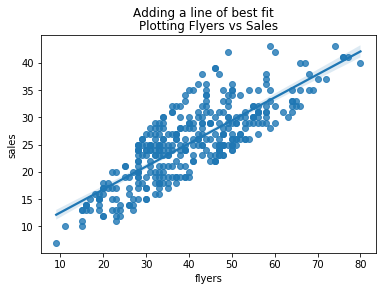

In [4]:
# allows me to see the line of best fit of flyers (x) to sales (y)
# Is it good/significant? 
plt.suptitle("Adding a line of best fit")
plt.title("Plotting Flyers vs Sales")
sns.regplot(x='flyers', y='sales', data = df)
plt.show()

# The Evaluation Playbook is here to help!
- Prerequisites:
    1. Establish a baseline
    2. Produce a super simple model
    3. Calculate the model and baseline residuals
- Evaluation
    1. Calculate evaluation metrics from residuals
    2. Determine if the model is significant
    3. Determine if the features are significant (we'll do this later)

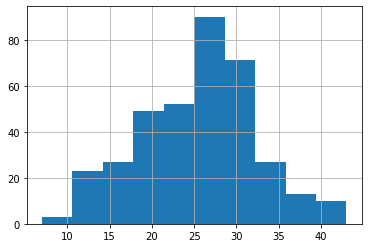

In [5]:
# Distribution is close to being normal, so we can use the mean to
# calculate the baseline
df.sales.hist()

In [6]:
# Pre-Req 1. 
baseline = df.sales.mean()

In [7]:
# Pre-req Part 2 - build/identify a super simple linear model
# Use the OLS (ordinary least square method)
from statsmodels.formula.api import ols

In [8]:
# The arguments to the ols function are the column names as strings, separated by ~
# ols("y ~ x") 
# ols("target ~ feature")
model = ols('sales ~ flyers', df).fit()

In [9]:
# Pre req 3, calculate residuals/error
evaluate = pd.DataFrame()

# setting up x independent variable
evaluate['x'] = df.flyers

# setting up y dependent variable
evaluate['y'] = df.sales

# setting up the baseline. baseline was established above
evaluate['baseline'] = baseline

# setting up y-hat AKA the predicted y-values. Just introduce model
evaluate['yhat'] = model.predict()

# calculate the baseline residuals (residual - actual y)
evaluate['baseline_residuals'] = evaluate.baseline - evaluate.y

# calculate the model residuals (y-hat - model)
evaluate['model_residual'] = evaluate.yhat - evaluate.y

evaluate.head()

,x,y,baseline,yhat,baseline_residuals,model_residual
0,15,10,25.323288,14.673754,15.323288,4.673754
1,15,13,25.323288,14.673754,12.323288,1.673754
2,27,15,25.323288,19.727926,10.323288,4.727926
3,28,17,25.323288,20.149107,8.323288,3.149107
4,33,18,25.323288,22.255013,7.323288,4.255013


## So how do we answer if the model beats the baseline
- Our metric will be the sum of squared errors
- We sum up the squares of every residual from baseline
- We sum up the squares of every residual from model
- Then we compare
### Here's the quick and easy arithmetic answer:
- Square the baseline_residual to get the baseline_sse
- Square the model_residual to get the model_sse

In [10]:
# Calculate if the model beats the baseline
# Square errors for 2 reasons
# 1. Squaring large numbers increases their magnitude (opposite for small)
# 2. Squaring removes negative residuals

# Baseline sum of squared errors
baseline_sse = (evaluate.baseline_residuals ** 2).sum()

# Model sum of squared errors
model_sse = (evaluate.model_residual ** 2).sum()

# Checking if our model beats our baseline
if model_sse < baseline_sse:
    print('Our model out performed our baseline')
    print('It makes sense to evaluate this model more thoroughly')
else:
    print('The baseline out performed the model')
    
print('Baseline SSE', baseline_sse)
print('Model SSE', model_sse)

Our model out performed our baseline
It makes sense to evaluate this model more thoroughly
Baseline SSE 17297.85205479452
Model SSE 6083.326244705024


# Now let's consider evaluation metrics

### Sum of Square Error (SSE)
- Squaring makes larger errors more significant
- Squaring also removes negative residuals

### Mean Squared Error (MSE)
- Average of all the squared errors

### Root Mean Squared Error (RMSE)
- Super useful
- Converts back to the same units

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [12]:
# Sum the squares of the baseline risidual/error
model_sse = (evaluate.model_residual ** 2).sum()

# Take the average of the sum of squared errors
# mse = model_sse / len(evaluate)

# We can also calculate using sklearns mean_squared_error function
mse = mean_squared_error(evaluate.y, evaluate.yhat)

# Now we'll take the Square Root of the Sum of Errors
# Taking the square root is nice because the units of the error 
# will be in the same units as the target variable.
rmse = sqrt(mse)

print("SSE is", model_sse, " which is the sum sf squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")

SSE is 6083.326244705024  which is the sum sf squared errors
MSE is 16.666647245767187  which is the average squared error
RMSE is 4.082480526073233  which is the square root of the MSE


### Evaluating Model Significance
$R^2$ tells you how well your model fits the data by measuring the strength of the relationship between your model and the dependent variable. However, it is not a formal test for the relationship. The F-test of overall significance is the hypothesis test for this relationship. It indicates whether your linear regression model provides a better fit to the data than a model that contains no independent variables.

If the overall F-test is significant (evident through the p-value of the F statistic), you can conclude that $R^2$ does not equal zero, and the correlation between the model and dependent variable is statistically significant.



In [13]:
# The model commented below is our model
# model = ols('sales ~ flyers', df).fit()
r2 = model.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.648



We will now compute the p-value to determine if our test is significant, i.e. can we trust that the explained variance means what we think it means? If we have a high $R^2$, does it really mean that there is correlation? If we have only two datapoints, then no

In [14]:
f_pval = model.f_pvalue
print('p-value for the model significance =', f_pval)
f_pval < .05

p-value for the model significance = 2.193718738113383e-84


True

- Null hypothesis is that a model not built w/ the independent variables explains the relationship
- Alternative hypothesis is that our model built on independent varibles explains the relationship, validates that $R^2$
- If p is less than 0.05, you're OK to conclude that your regression model fits the data better than the model with no independent variables, meaning the independent variables in your model improve the fit.
- If greater than 0.05, it's probably better to stop using this set of features.
- Basically, if the p is low, we can reject the null hypothesis.
- And that means we can accept the model as statistically significant

In [15]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    # ls line style allows dotted line
    plt.hlines(0, actual.min(), actual.max(), ls=':')   
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    return plt.gca()

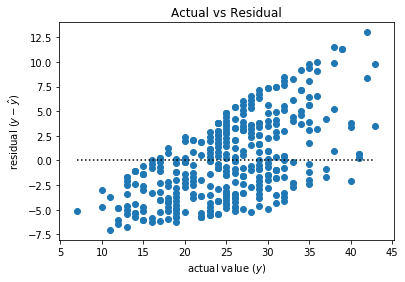

In [16]:
plot_residuals(evaluate.y, evaluate.yhat)

# Predicting sales now with rainfall

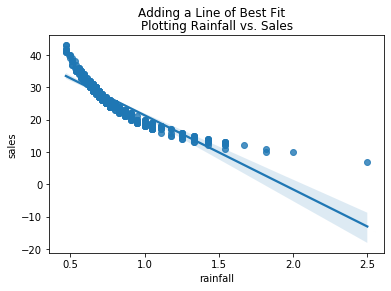

In [17]:
plt.suptitle("Adding a Line of Best Fit")
plt.title("Plotting Rainfall vs. Sales")

sns.regplot(x="rainfall", y="sales", data=df)
plt.show()

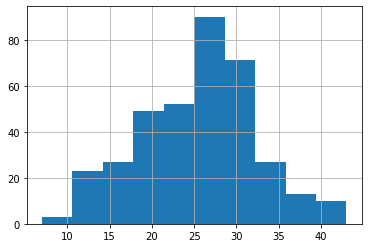

In [18]:
# Baseline is the same since the sales hist is normally distributed
df.sales.hist()

In [19]:
# Pre-Req 1 identify baseline
baseline = df.sales.mean()

In [20]:
# Pre-Req 2 build a simple linear model and fit
model2 = ols('sales ~ rainfall', df).fit()

In [21]:
evaluate2 = pd.DataFrame()
evaluate2['x'] = df.rainfall
evaluate2['y'] = df.sales
evaluate2['baseline'] = baseline
evaluate2['yhat'] = model2.predict()
evaluate2['baseline_residual'] = evaluate2.baseline - evaluate2.y
evaluate2['model_residual'] = evaluate2.yhat - evaluate2.y

evaluate2.head()

,x,y,baseline,yhat,baseline_residual,model_residual
0,2.00,10,25.323288,-1.599602,15.323288,-11.599602
1,1.33,13,25.323288,13.773142,12.323288,0.773142
2,1.33,15,25.323288,13.773142,10.323288,-1.226858
3,1.05,17,25.323288,20.197573,8.323288,3.197573
4,1.00,18,25.323288,21.344793,7.323288,3.344793


In [22]:
baseline_sse = (evaluate2.baseline_residual**2).sum()
model_sse = (evaluate2.model_residual**2).sum()

if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 2998.2371310300655


In [23]:
# Take the average of the Sum of squared errors
# mse = model_sse / len(evaluate)
# Or we could calculate this using sklearn's mean_squared_error function
mse = mean_squared_error(evaluate2.y, evaluate2.yhat)

# Now we'll take the Square Root of the Sum of Errors
# Taking the square root is nice because the units of the error 
# will be in the same units as the target variable.
rmse = sqrt(mse)

print("SSE is", model_sse, " which is the sum sf squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")


SSE is 2998.2371310300655  which is the sum sf squared errors
MSE is 8.21434830419196  which is the average squared error
RMSE is 2.866068440249109  which is the square root of the MSE


In [24]:
# The model commented below is our model
# model2 = ols('rainfall ~ flyers', df).fit()
r2 = model2.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.827


In [25]:
f_pval = model2.f_pvalue
print("p-value for model significance = ", f_pval)

p-value for model significance =  3.2988846597381e-140


### P-value is less than alpha, we reject the null hyp. Our regression model fits the data better than the baseline. The reg model is statisticlly significantly. This model outperformed the flyers model with a higher R-squared and lower p-value.

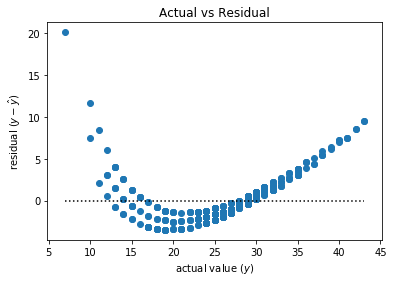

In [26]:
plot_residuals(evaluate2.y, evaluate2.yhat)

# Predicting sales now with log rainfall

In [28]:
# need to create a log rainfall column in DF
df.head()

,temperature,rainfall,flyers,sales
0,27.0,2.00,15,10
1,28.9,1.33,15,13
2,34.5,1.33,27,15
3,44.1,1.05,28,17
4,42.4,1.00,33,18


In [29]:
df['log_rainfall'] = np.log(df.rainfall)
df.head()

,temperature,rainfall,flyers,sales,log_rainfall
0,27.0,2.00,15,10,0.693147
1,28.9,1.33,15,13,0.285179
2,34.5,1.33,27,15,0.285179
3,44.1,1.05,28,17,0.048790
4,42.4,1.00,33,18,0.000000


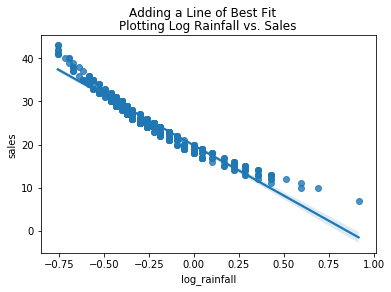

In [30]:
plt.suptitle("Adding a Line of Best Fit")
plt.title("Plotting Log Rainfall vs. Sales")

sns.regplot(x="log_rainfall", y="sales", data=df)
plt.show()

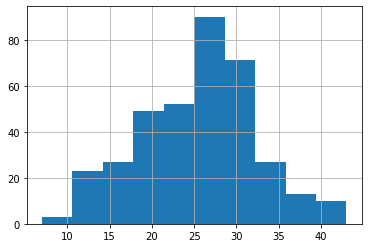

In [31]:
df.sales.hist()

In [33]:
# Pre-requisite Part 1 - establish a baseline. 
# Since sales are reasonably normally distributed we will use the mean
baseline = df.sales.mean()

In [34]:
model3 = ols('sales ~ log_rainfall', df).fit()

In [35]:
evaluate3 = pd.DataFrame()
evaluate3['x'] = df.log_rainfall
evaluate3['y'] = df.sales
evaluate3['baseline'] = baseline
evaluate3['yhat'] = model3.predict()
evaluate3['baseline_residual'] = evaluate3.baseline - evaluate3.y
evaluate3['model_residual'] = evaluate3.yhat - evaluate3.y

evaluate3.head()

,x,y,baseline,yhat,baseline_residual,model_residual
0,0.693147,10,25.323288,3.688573,15.323288,-6.311427
1,0.285179,13,25.323288,13.198359,12.323288,0.198359
2,0.285179,15,25.323288,13.198359,10.323288,-1.801641
3,0.048790,17,25.323288,18.708608,8.323288,1.708608
4,0.000000,18,25.323288,19.845912,7.323288,1.845912


In [36]:
baseline_sse = (evaluate3.baseline_residual ** 2).sum()
model_sse = (evaluate3.model_residual **2 ).sum()

if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 952.3253474293444


In [37]:
# Take the average of the Sum of squared errors
# mse = model_sse / len(evaluate)
# Or we could calculate this using sklearn's mean_squared_error function
mse = mean_squared_error(evaluate3.y, evaluate3.yhat)

# Now we'll take the Square Root of the Sum of Errors
# Taking the square root is nice because the units of the error 
# will be in the same units as the target variable.
rmse = sqrt(mse)

print("SSE is", model_sse, " which is the sum sf squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")



SSE is 952.3253474293444  which is the sum sf squared errors
MSE is 2.6091105409023134  which is the average squared error
RMSE is 1.6152741380033029  which is the square root of the MSE


In [38]:
# The model commented below is our model
# model3 = ols('sales ~ log_rainfall', df).fit()
r2 = model3.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.945


In [39]:
f_pval = model3.f_pvalue
print("p-value for model significance = ", f_pval)

p-value for model significance =  1.224262409779449e-230


### P-value is less than alpha, we reject the null hyp. Our regression model fits the data better than the baseline. The reg model is statisticlly significantly. This model outperformed the flyers model and the rainfall model with a higher R-squared and lower p-value. We would use this model as we had a high r-squared and low p-value. The model helped with the high errors making them smaller when squaring the error.

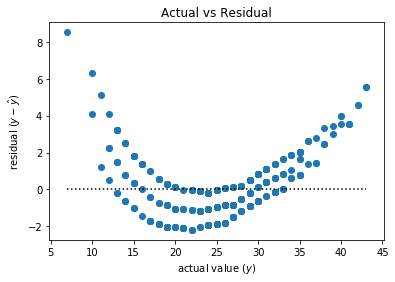

In [40]:
# The dotted line represents 
plot_residuals(evaluate3.y, evaluate3.yhat)

# Predicting sales now with temperature rainfall

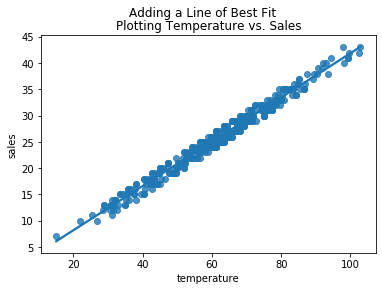

In [41]:
plt.suptitle("Adding a Line of Best Fit")
plt.title("Plotting Temperature vs. Sales")

sns.regplot(x="temperature", y="sales", data=df)
plt.show()

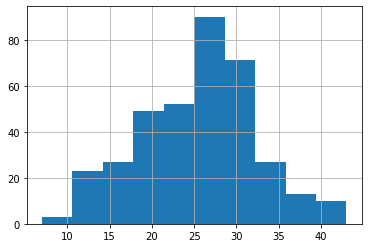

In [42]:
df.sales.hist()

In [43]:
# Pre-requisite Part 1 - establish a baseline. 
# Since sales are reasonably normally distributed we will use the mean
baseline = df.sales.mean()

In [44]:
model4 = ols('sales ~ temperature', df).fit()

In [45]:
evaluate4 = pd.DataFrame()
evaluate4['x'] = df.temperature
evaluate4['y'] = df.sales
evaluate4['baseline'] = baseline
evaluate4['yhat'] = model4.predict()
evaluate4['baseline_residual'] = evaluate4.baseline - evaluate4.y
evaluate4['model_residual'] = evaluate4.yhat - evaluate4.y

evaluate4.head()

,x,y,baseline,yhat,baseline_residual,model_residual
0,27.0,10,25.323288,11.112301,15.323288,1.112301
1,28.9,13,25.323288,11.912772,12.323288,-1.087228
2,34.5,15,25.323288,14.272055,10.323288,-0.727945
3,44.1,17,25.323288,18.316540,8.323288,1.316540
4,42.4,18,25.323288,17.600329,7.323288,-0.399671


In [46]:
baseline_sse = (evaluate4.baseline_residual ** 2).sum()
model_sse = (evaluate4.model_residual **2 ).sum()

if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 349.977815203168


In [64]:
# Sum the squares of the baseline risidual/error
model_sse = (evaluate4.model_residual ** 2).sum()

# Take the average of the sum of squared errors
# mse = model_sse / len(evaluate)

# We can also calculate using sklearns mean_squared_error function
mse = mean_squared_error(evaluate4.y, evaluate4.yhat)

# Now we'll take the Square Root of the Sum of Errors
# Taking the square root is nice because the units of the error 
# will be in the same units as the target variable.
rmse = sqrt(mse)

print("SSE is", model_sse, " which is the sum sf squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")

SSE is 349.977815203168  which is the sum sf squared errors
MSE is 0.9588433293237479  which is the average squared error
RMSE is 0.979205458177061  which is the square root of the MSE


In [47]:
# The model commented below is our model
# model4 = ols('sales ~ temperature', df).fit()
r2 = model4.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.98


In [48]:
f_pval = model4.f_pvalue
print("p-value for model significance = ", f_pval)

p-value for model significance =  1.492364042585725e-309


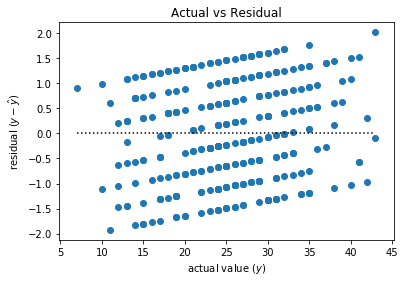

In [53]:
# The dotted line represents 
plot_residuals(evaluate4.y, evaluate4.yhat)

### P-value is less than alpha, we reject the null hyp. Our regression model fits the data better than the baseline. The reg model is statisticlly significantly. This model outperformed the flyers model, the rainfall model and the log_rainfall modelwith a higher R-squared and lower p-value. The best model was temperature with a low SSE value and p-value and high r-squared

### Tips dataset
Load the tips dataset from pydataset or seaborn
Define your baseline for "tip". Our goal will be to see if we can make a model that is better than baseline for predicting tips on total_bill.
Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill. Here is some sample code to get you started:
from statsmodels.formula.api import ols
from pydataset import data

df = data("tips")

model = ols('tip ~ total_bill', data=df).fit()

predictions = model.predict(df.x)
1. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

2. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

3. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

4. What is the amount of variance explained in your model?

5. Is your model significantly better than the baseline model?

6. Plot the residuals for the linear regression model that you made.

In [49]:
df2 = data('tips')

In [50]:
df2.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


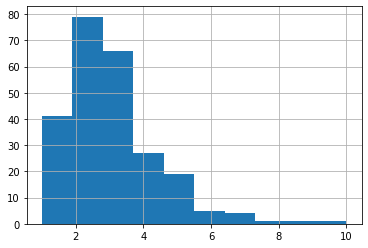

In [55]:
df2.tip.hist()

In [59]:
baseline = df2.tip.median()

In [60]:
model5 = ols('tip ~ total_bill', data=df2).fit()

In [61]:
evaluate5 = pd.DataFrame()
evaluate5['x'] = df2.total_bill
evaluate5['y'] = df2.tip
evaluate5['baseline'] = baseline
evaluate5['yhat'] = model5.predict()
evaluate5['baseline_residual'] = evaluate5.baseline - evaluate5.y
evaluate5['model_residual'] = evaluate5.yhat - evaluate5.y

evaluate5.head()

,x,y,baseline,yhat,baseline_residual,model_residual
1,16.99,1.01,2.9,2.704636,1.89,1.694636
2,10.34,1.66,2.9,2.006223,1.24,0.346223
3,21.01,3.50,2.9,3.126835,-0.60,-0.373165
4,23.68,3.31,2.9,3.407250,-0.41,0.097250
5,24.59,3.61,2.9,3.502822,-0.71,-0.107178


In [62]:
baseline_sse = (evaluate5.baseline_residual ** 2).sum()
model_sse = (evaluate5.model_residual **2 ).sum()

if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 467.56919999999997
Model SSE 252.788743850776


In [63]:
# Sum the squares of the baseline risidual/error
model_sse = (evaluate5.model_residual ** 2).sum()

# Take the average of the sum of squared errors
# mse = model_sse / len(evaluate)

# We can also calculate using sklearns mean_squared_error function
mse = mean_squared_error(evaluate5.y, evaluate5.yhat)

# Now we'll take the Square Root of the Sum of Errors
# Taking the square root is nice because the units of the error 
# will be in the same units as the target variable.
rmse = sqrt(mse)

print("SSE is", model_sse, " which is the sum sf squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")

SSE is 252.788743850776  which is the sum sf squared errors
MSE is 1.036019442011377  which is the average squared error
RMSE is 1.0178504025697377  which is the square root of the MSE


In [65]:
# The model commented below is our model
# model5 ols('sales ~ temperature', df).fit()
r2 = model5.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.457


In [69]:
f_pval = model5.f_pvalue
print("p-value for model significance = ", f_pval)
print('Model is significantly better than the baseline')

p-value for model significance =  6.692470646863376e-34
Model is significantly better than the baseline


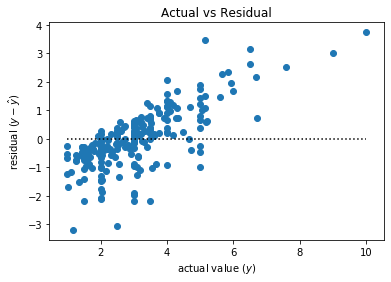

In [68]:
# The dotted line represents 
plot_residuals(evaluate5.y, evaluate5.yhat)

In [70]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   explore_telco.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	evaluate.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [71]:
!git add evaluate.ipynb

In [73]:
!git commit -m 'Adding completed exercise'

[master 218bd61] Adding completed exercise
 1 file changed, 2321 insertions(+)
 create mode 100644 evaluate.ipynb


In [74]:
!git push

Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 8 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 161.16 KiB | 13.43 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/george887/regression-exercises.git
   3614db0..218bd61  master -> master
